In [259]:
import sys
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

sys.path.append(os.getcwd()+'/../scripts/')
from Preprocessing import Preprocessing

plt.rcParams["figure.figsize"]=40,20

In [229]:
abs_data = pd.read_csv('../absorbancia.csv')

In [230]:
abs_data = abs_data[abs_data.columns[4:]]
abs_data.fillna(0, inplace=True)

In [231]:
cols = []

In [232]:
for col in abs_data.columns:
    if(abs_data[col].dtype == 'object'):
        abs_data[col] = abs_data[col].astype('float')

In [233]:
abs_data = abs_data[abs_data.sum(axis=1) > 0]

In [239]:
abs_data = abs_data.drop(columns=abs_data.columns[abs_data.sum(axis=0) == 0])

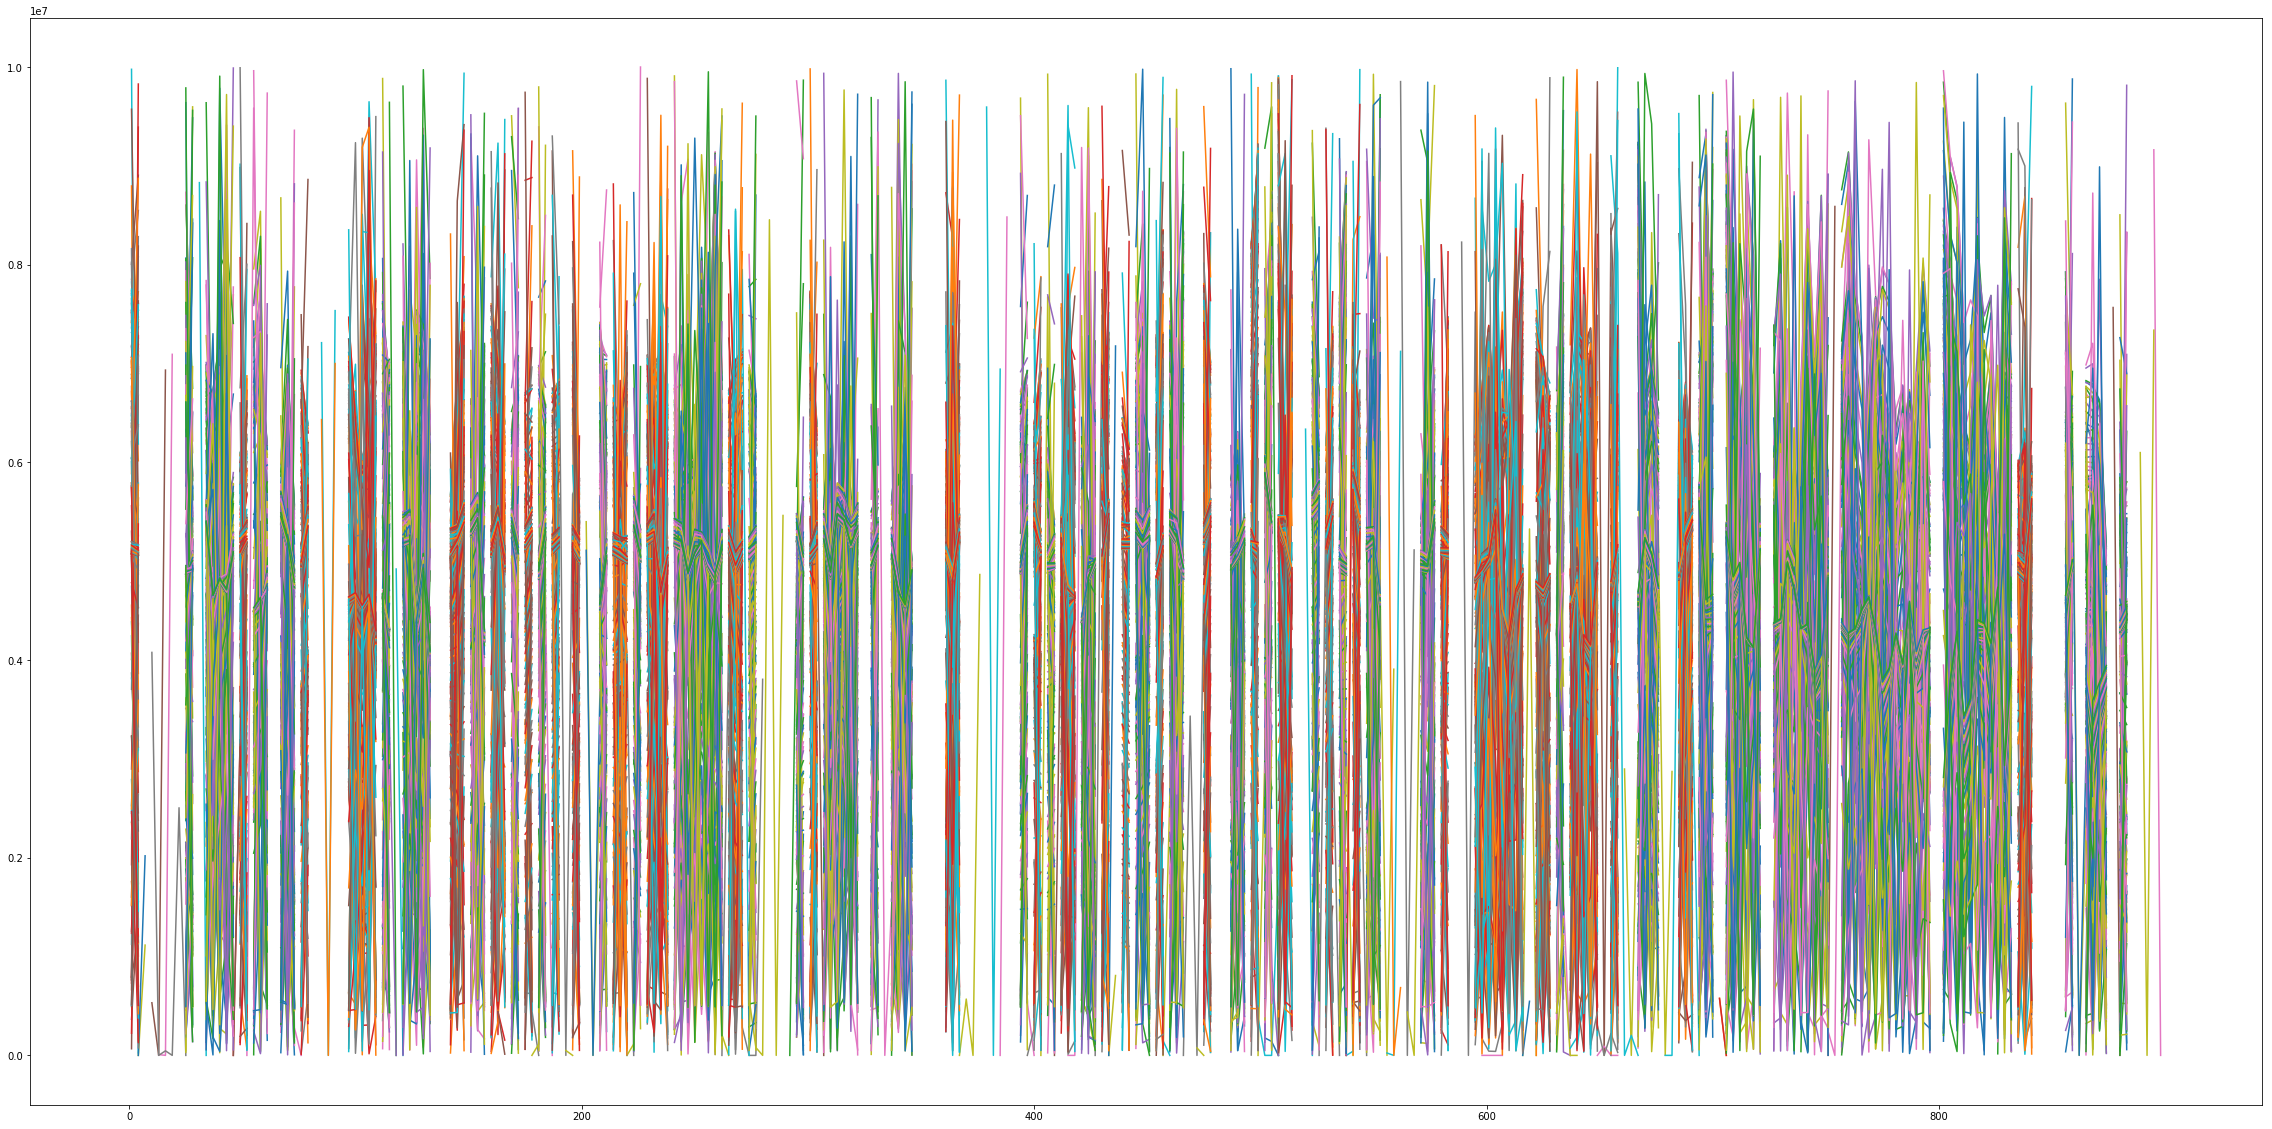

In [260]:
plt.plot(abs_data[abs_data[:300]> 0])